In [1]:
import pandas as pd
import numpy as np

In [2]:
# 파일 불러오기
covid = pd.read_csv("KGU_3rd_ORIGIN_KGUDSTNORDER_20210101000000.csv",header=None)
covid

,0,1,2,3,4,5
0,2021-01-01,0,돈까스/일식,경기도,동두천시,3
1,2021-01-01,0,돈까스/일식,경기도,부천시,49
2,2021-01-01,0,돈까스/일식,경기도,안산시 상록구,5
3,2021-01-01,0,돈까스/일식,경기도,의정부시,6
4,2021-01-01,0,돈까스/일식,경상남도,진주시,3
...,...,...,...,...,...,...
1026041,2021-07-31,23,한식,제주특별자치도,서귀포시,1
1026042,2021-07-31,23,한식,충청남도,천안시 서북구,2
1026043,2021-07-31,23,회,경기도,이천시,2
1026044,2021-07-31,23,회,전라남도,광양시,2


In [3]:
# 칼럼명 변경
covid.rename(columns={0:'날짜', 1:'시간', 2:'분류', 3:'도', 4:'구', 5:'건수'}, inplace=True)

In [4]:
# 서울특별시만 추출
seoul = covid[covid['도'] == '서울특별시']

In [5]:
seoul = seoul.drop(['분류','도'], axis=1)
seoul

,날짜,시간,구,건수
6,2021-01-01,0,구로구,4
7,2021-01-01,0,영등포구,1
8,2021-01-01,0,은평구,5
13,2021-01-01,0,동작구,2
14,2021-01-01,0,서초구,1
...,...,...,...,...
1026009,2021-07-31,23,서초구,1
1026010,2021-07-31,23,양천구,1
1026037,2021-07-31,23,관악구,1
1026038,2021-07-31,23,금천구,1


In [6]:
seoul = seoul.sort_values(by=['날짜','시간','구'], ascending=True)
seoul = seoul.reset_index()
seoul

,index,날짜,시간,구,건수
0,25,2021-01-01,0,관악구,6
1,46,2021-01-01,0,관악구,4
2,64,2021-01-01,0,관악구,7
3,82,2021-01-01,0,관악구,4
4,104,2021-01-01,0,관악구,12
...,...,...,...,...,...
167797,1025913,2021-07-31,23,영등포구,12
167798,1025929,2021-07-31,23,영등포구,3
167799,1025957,2021-07-31,23,영등포구,2
167800,1025983,2021-07-31,23,영등포구,1


In [7]:
seoul = seoul.drop('index', axis=1)

In [8]:
seoul

,날짜,시간,구,건수
0,2021-01-01,0,관악구,6
1,2021-01-01,0,관악구,4
2,2021-01-01,0,관악구,7
3,2021-01-01,0,관악구,4
4,2021-01-01,0,관악구,12
...,...,...,...,...
167797,2021-07-31,23,영등포구,12
167798,2021-07-31,23,영등포구,3
167799,2021-07-31,23,영등포구,2
167800,2021-07-31,23,영등포구,1


In [9]:
# 날짜 추출; 월, 일로 나누기
import datetime

seoul['날짜'] = pd.to_datetime(seoul['날짜'])
seoul['월'] = seoul['날짜'].dt.month
seoul['일'] = seoul['날짜'].dt.day


In [10]:
# 코로나 확진자수가 가장 많았던 7월 배달 현황 확인해보기
july = seoul[seoul['월']==7]

In [11]:
july

,날짜,시간,구,건수,월,일
149016,2021-07-01,0,강서구,1,7,1
149017,2021-07-01,0,관악구,8,7,1
149018,2021-07-01,0,관악구,4,7,1
149019,2021-07-01,0,관악구,1,7,1
149020,2021-07-01,0,구로구,2,7,1
...,...,...,...,...,...,...
167797,2021-07-31,23,영등포구,12,7,31
167798,2021-07-31,23,영등포구,3,7,31
167799,2021-07-31,23,영등포구,2,7,31
167800,2021-07-31,23,영등포구,1,7,31


In [12]:
july['일'] = july['날짜'].dt.day
july

<ipython-input-12-2afb13be2c0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  july['일'] = july['날짜'].dt.day


,날짜,시간,구,건수,월,일
149016,2021-07-01,0,강서구,1,7,1
149017,2021-07-01,0,관악구,8,7,1
149018,2021-07-01,0,관악구,4,7,1
149019,2021-07-01,0,관악구,1,7,1
149020,2021-07-01,0,구로구,2,7,1
...,...,...,...,...,...,...
167797,2021-07-31,23,영등포구,12,7,31
167798,2021-07-31,23,영등포구,3,7,31
167799,2021-07-31,23,영등포구,2,7,31
167800,2021-07-31,23,영등포구,1,7,31


In [13]:
# 구, 시간 고유값 추출; 일별로 구를 확인하기 위함
gu = []
gu = seoul['구'].unique()

time = []
time = seoul['시간'].unique()

In [14]:
july['일'] = july['일'].astype('int64')

<ipython-input-14-0acae6e96a72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  july['일'] = july['일'].astype('int64')


In [15]:
july.dtypes

날짜    datetime64[ns]
시간             int64
구             object
건수             int64
월              int64
일              int64
dtype: object

In [16]:
dd = []
dd = july['일'].unique()

In [17]:
new_list = []

for i in dd:
    for j in time:
        for k in gu:
            new_list.append([i,j,k])
            
new_list

[[1, 0, '관악구'],
 [1, 0, '구로구'],
 [1, 0, '금천구'],
 [1, 0, '노원구'],
 [1, 0, '도봉구'],
 [1, 0, '동작구'],
 [1, 0, '서초구'],
 [1, 0, '양천구'],
 [1, 0, '영등포구'],
 [1, 0, '은평구'],
 [1, 0, '강남구'],
 [1, 0, '강서구'],
 [1, 0, '강북구'],
 [1, 0, '마포구'],
 [1, 0, '서대문구'],
 [1, 0, '용산구'],
 [1, 0, '종로구'],
 [1, 0, '중구'],
 [1, 0, '송파구'],
 [1, 0, '성동구'],
 [1, 0, '중랑구'],
 [1, 0, '성북구'],
 [1, 0, '강동구'],
 [1, 1, '관악구'],
 [1, 1, '구로구'],
 [1, 1, '금천구'],
 [1, 1, '노원구'],
 [1, 1, '도봉구'],
 [1, 1, '동작구'],
 [1, 1, '서초구'],
 [1, 1, '양천구'],
 [1, 1, '영등포구'],
 [1, 1, '은평구'],
 [1, 1, '강남구'],
 [1, 1, '강서구'],
 [1, 1, '강북구'],
 [1, 1, '마포구'],
 [1, 1, '서대문구'],
 [1, 1, '용산구'],
 [1, 1, '종로구'],
 [1, 1, '중구'],
 [1, 1, '송파구'],
 [1, 1, '성동구'],
 [1, 1, '중랑구'],
 [1, 1, '성북구'],
 [1, 1, '강동구'],
 [1, 2, '관악구'],
 [1, 2, '구로구'],
 [1, 2, '금천구'],
 [1, 2, '노원구'],
 [1, 2, '도봉구'],
 [1, 2, '동작구'],
 [1, 2, '서초구'],
 [1, 2, '양천구'],
 [1, 2, '영등포구'],
 [1, 2, '은평구'],
 [1, 2, '강남구'],
 [1, 2, '강서구'],
 [1, 2, '강북구'],
 [1, 2, '마포구'],
 [1, 2, '서대문구'],
 [1, 2, '용산구'],
 [1,

In [18]:
jj = pd.DataFrame(new_list)

In [19]:
jj

,0,1,2
0,1,0,관악구
1,1,0,구로구
2,1,0,금천구
3,1,0,노원구
4,1,0,도봉구
...,...,...,...
16003,31,23,송파구
16004,31,23,성동구
16005,31,23,중랑구
16006,31,23,성북구


In [20]:
jj.rename(columns={0:'일', 1:'시간', 2:'구'}, inplace=True)
jj

,일,시간,구
0,1,0,관악구
1,1,0,구로구
2,1,0,금천구
3,1,0,노원구
4,1,0,도봉구
...,...,...,...
16003,31,23,송파구
16004,31,23,성동구
16005,31,23,중랑구
16006,31,23,성북구


In [21]:
fin = pd.merge(jj, july, on=['일', '시간', '구'], how='left')
fin

,일,시간,구,날짜,건수,월
0,1,0,관악구,2021-07-01,8.0,7.0
1,1,0,관악구,2021-07-01,4.0,7.0
2,1,0,관악구,2021-07-01,1.0,7.0
3,1,0,구로구,2021-07-01,2.0,7.0
4,1,0,구로구,2021-07-01,1.0,7.0
...,...,...,...,...,...,...
29231,31,23,송파구,NaT,NaN,NaN
29232,31,23,성동구,NaT,NaN,NaN
29233,31,23,중랑구,NaT,NaN,NaN
29234,31,23,성북구,NaT,NaN,NaN


In [22]:
fin = fin.drop(['날짜', '월'], axis=1)
fin

,일,시간,구,건수
0,1,0,관악구,8.0
1,1,0,관악구,4.0
2,1,0,관악구,1.0
3,1,0,구로구,2.0
4,1,0,구로구,1.0
...,...,...,...,...
29231,31,23,송파구,NaN
29232,31,23,성동구,NaN
29233,31,23,중랑구,NaN
29234,31,23,성북구,NaN


In [23]:
fin.fillna(0, inplace=True)

In [24]:
fin

,일,시간,구,건수
0,1,0,관악구,8.0
1,1,0,관악구,4.0
2,1,0,관악구,1.0
3,1,0,구로구,2.0
4,1,0,구로구,1.0
...,...,...,...,...
29231,31,23,송파구,0.0
29232,31,23,성동구,0.0
29233,31,23,중랑구,0.0
29234,31,23,성북구,0.0


In [25]:
fin['건수'] = fin['건수'].astype(int)
fin

,일,시간,구,건수
0,1,0,관악구,8
1,1,0,관악구,4
2,1,0,관악구,1
3,1,0,구로구,2
4,1,0,구로구,1
...,...,...,...,...
29231,31,23,송파구,0
29232,31,23,성동구,0
29233,31,23,중랑구,0
29234,31,23,성북구,0


In [26]:
ff = pd.DataFrame(fin.groupby(['일', '시간'])['건수'].sum())
ff

건수
일  시간     
1  0    26
   1     8
   2    13
   3     7
   4    10
...    ...
31 19  454
   20  347
   21  209
   22  171
   23   76

[696 rows x 1 columns]

In [27]:
ff.to_csv("time.csv", encoding='cp949')

In [28]:
import matplotlib.pyplot as plt
#plt.rcParams['font.family'] = "Malgun Gothic"

In [29]:
# 일자별 시간대에 따른 배달과 확진자수 시각화
dff = pd.read_csv("time.csv", encoding='cp949')
dff

all_days = []
for i in range(31):
    i= i+1
    ls = dff[dff['일'] == i]['건수'].tolist()
    ls.insert(0, str(i)+"일")
    all_days.append(ls)


df = pd.DataFrame(all_days, columns = range(25))


day_total=[]
for i in range(31):
    i= i+1
    ls = dff[dff['일'] == i]['건수'].sum()
    day_total.append(ls)

print(day_total)
df[25] = day_total
df

[2221, 2522, 3295, 3045, 1793, 2053, 2113, 2403, 3059, 3648, 3881, 2377, 2615, 2733, 2978, 3409, 3783, 3634, 2596, 0, 0, 1613, 3101, 3584, 3761, 2337, 2394, 2529, 2488, 2887, 3503]


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1일,26.0,8.0,13.0,7.0,10.0,6.0,5.0,5.0,1.0,...,77.0,120.0,176.0,310.0,282.0,266.0,177.0,110.0,40.0,2221
1,2일,23.0,20.0,16.0,6.0,8.0,3.0,5.0,3.0,3.0,...,97.0,107.0,174.0,289.0,359.0,312.0,214.0,192.0,78.0,2522
2,3일,31.0,26.0,24.0,11.0,15.0,9.0,4.0,2.0,14.0,...,161.0,238.0,397.0,420.0,363.0,258.0,193.0,169.0,91.0,3295
3,4일,57.0,29.0,24.0,6.0,7.0,5.0,2.0,2.0,7.0,...,187.0,247.0,313.0,360.0,306.0,221.0,163.0,137.0,45.0,3045
4,5일,14.0,27.0,6.0,2.0,5.0,0.0,5.0,0.0,1.0,...,73.0,96.0,133.0,227.0,228.0,190.0,148.0,116.0,51.0,1793
5,6일,23.0,24.0,12.0,4.0,3.0,1.0,4.0,2.0,4.0,...,74.0,96.0,180.0,264.0,257.0,212.0,163.0,116.0,51.0,2053
6,7일,27.0,14.0,16.0,5.0,6.0,1.0,4.0,5.0,6.0,...,74.0,112.0,168.0,300.0,283.0,241.0,143.0,101.0,54.0,2113
7,8일,20.0,24.0,19.0,9.0,9.0,5.0,6.0,3.0,3.0,...,92.0,124.0,204.0,289.0,329.0,282.0,179.0,135.0,54.0,2403
8,9일,17.0,16.0,16.0,6.0,5.0,6.0,5.0,2.0,8.0,...,112.0,121.0,206.0,450.0,453.0,355.0,240.0,198.0,79.0,3059
9,10일,33.0,28.0,17.0,8.0,3.0,7.0,5.0,7.0,8.0,...,185.0,261.0,360.0,421.0,398.0,314.0,258.0,181.0,84.0,3648


<AxesSubplot:xlabel='0'>

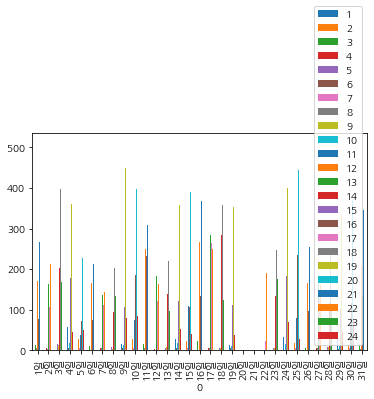

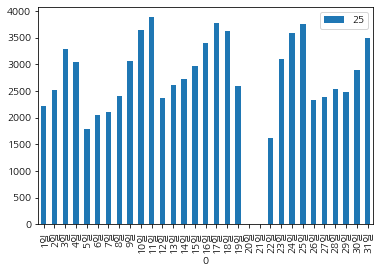

In [30]:
df.plot(x=0, y = range(1,25), kind = "bar")
dfff = df[[0, 25]]
dfff.plot(x=0, y=[25], kind = "bar")

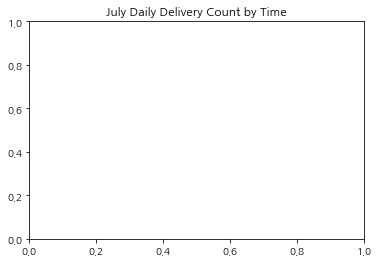

In [31]:

plt.tight_layout
plt.title("July Daily Delivery Count by Time")

plt.savefig('skssks.png')